 #  **Dating App User Profiles' stats - Lovoo v3**
 
# Group number 30
 

<center><img src="https://github.com/gil261/project1/blob/main/lovoo_logo.jpg?raw=true" 
width="1000"></center>
 

 ## **Name of students:**
 ### Roni Fahima ### 
 ### Gil Hatiel ###


<b id="Top"> </b>  

1. [Relevant libraries](#section1)
2. [dtypes & info](#section2)
3. [Conclusion 1](#section3)
4. [Conclusion 2](#section4)
5. [Conclusion 3](#section5)


Link to our data on Kaggle : https://www.kaggle.com/datasets/jmmvutu/dating-app-lovoo-user-profiles/data?select=lovoo_v3_users_instances.csv

sources : Lovoo (see lovoo.com)

<a id='section1'> </a>
# $\text{Relevant libraries}$



In [28]:
#!pip install wordcloud
#!pip install folium

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import STOPWORDS, WordCloud

<a id='section2'> </a>
# $\text{dtypes & info}$

In [2]:
url = 'https://raw.githubusercontent.com/ronifahima/project-Roni-and-Gil/main/lovoo_v3_users_api-results%20(1).csv'
df_lovoo = pd.read_csv(url)
df_lovoo.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


#### checking for duplicate uesers by userId

In [3]:
duplicate_userId_rows = df_lovoo[df_lovoo.duplicated(subset=['userId'], keep=False)]
duplicate_userId_rows

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile


### Information on the data

In [4]:
df_lovoo.shape

(3992, 42)

In [5]:
df_lovoo.isnull().sum().sort_values()

gender                       0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
isInfluencer                 0
lang_de                      0
lang_es                      0
lang_pt                      0
verified                     0
shareProfileEnabled          0
birthd                       0
userId                       0
lang_it                      0
isHighlighted                0
isMobile                     0
counts_profileVisits         0
name                         0
counts_details               0
counts_pictures              0
isFlirtstar                  0
counts_kisses                0
counts_fans                  0
counts_g                     0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
age                          0
genderLooking                0
flirtInterests_chat          0
lastOnli

In [6]:
df_lovoo.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile'],
      dtype='object')

In [7]:
df_lovoo.dtypes

gender                     object
genderLooking              object
age                         int64
name                       object
counts_details            float64
counts_pictures             int64
counts_profileVisits        int64
counts_kisses               int64
counts_fans                 int64
counts_g                    int64
flirtInterests_chat          bool
flirtInterests_friends       bool
flirtInterests_date          bool
country                    object
city                       object
location                   object
distance                  float64
isFlirtstar                 int64
isHighlighted               int64
isInfluencer                int64
isMobile                    int64
isNew                       int64
isOnline                    int64
isVip                       int64
lang_count                  int64
lang_fr                      bool
lang_en                      bool
lang_de                      bool
lang_it                      bool
lang_es       

#### Convert Boolean values to numeric values to perform correlation analysis

In [8]:
dict_mapping = {True: 1 , False: 0}
df_lovoo['flirtInterests_chat_numeric']= df_lovoo['flirtInterests_chat'].map(dict_mapping)
df_lovoo['flirtInterests_friends_numeric']= df_lovoo['flirtInterests_friends'].map(dict_mapping)
df_lovoo['flirtInterests_date_numeric']= df_lovoo['flirtInterests_date'].map(dict_mapping)
df_lovoo['lang_en_numeric']= df_lovoo['lang_en'].map(dict_mapping)
df_lovoo['lang_de_numeric']= df_lovoo['lang_de'].map(dict_mapping)
df_lovoo['lang_it_numeric']= df_lovoo['lang_it'].map(dict_mapping)
df_lovoo['lang_es_numeric']= df_lovoo['lang_es'].map(dict_mapping)
df_lovoo['lang_pt_numeric']= df_lovoo['lang_pt'].map(dict_mapping)
df_lovoo['lang_fr_numeric']= df_lovoo['lang_fr'].map(dict_mapping)
df_lovoo[['flirtInterests_chat_numeric', "flirtInterests_chat",  'flirtInterests_friends_numeric', 'flirtInterests_friends', 'flirtInterests_date_numeric','flirtInterests_date','lang_en_numeric','lang_en','lang_de_numeric','lang_de','lang_it_numeric','lang_it','lang_es_numeric','lang_es','lang_pt_numeric','lang_pt']]

,flirtInterests_chat_numeric,flirtInterests_chat,flirtInterests_friends_numeric,flirtInterests_friends,flirtInterests_date_numeric,flirtInterests_date,lang_en_numeric,lang_en,lang_de_numeric,lang_de,lang_it_numeric,lang_it,lang_es_numeric,lang_es,lang_pt_numeric,lang_pt
0,1,True,1,True,1,True,0,False,1,True,0,False,0,False,0,False
1,1,True,1,True,1,True,0,False,1,True,1,True,0,False,0,False
2,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False
3,1,True,1,True,0,False,1,True,0,False,0,False,0,False,0,False
4,1,True,0,False,0,False,0,False,1,True,0,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False
3988,0,False,0,False,0,False,0,False,0,False,1,True,0,False,0,False
3989,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False
3990,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False


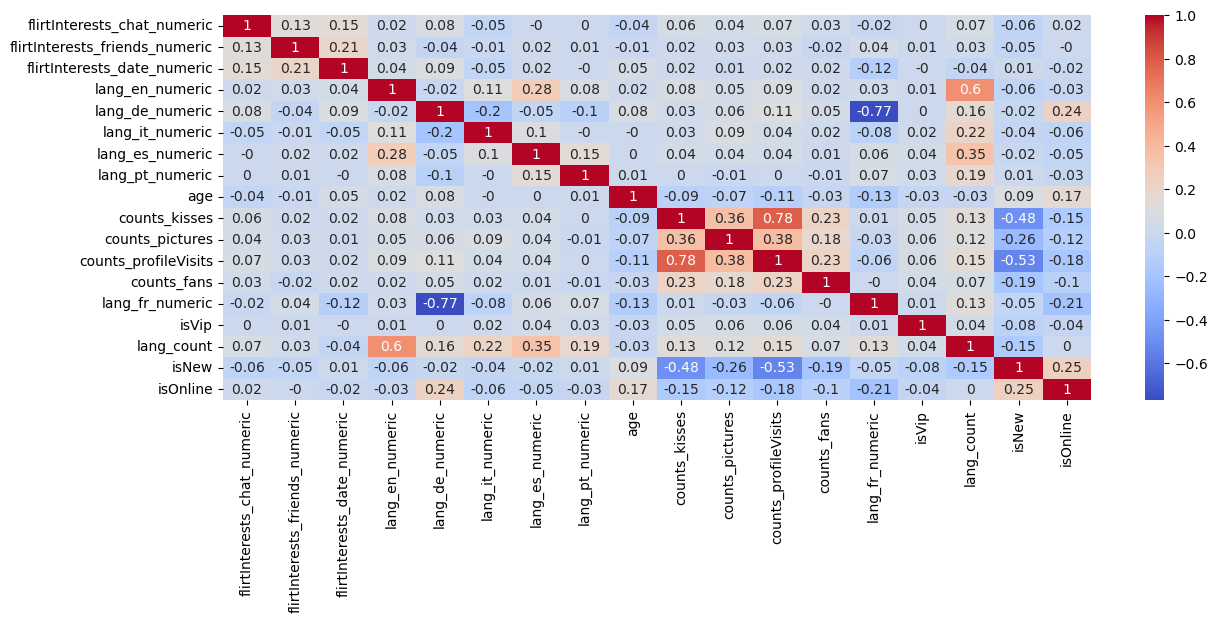

In [9]:
my_list = ['flirtInterests_chat_numeric','flirtInterests_friends_numeric','flirtInterests_date_numeric','lang_en_numeric','lang_de_numeric','lang_it_numeric','lang_es_numeric','lang_pt_numeric','age','counts_kisses','counts_pictures','counts_profileVisits','counts_fans','lang_fr_numeric','isVip','lang_count','isNew','isOnline']
plt.figure(figsize=(14,5))
correlation_matrix = df_lovoo[my_list].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Analysis by location
#### We used ChatGPT to add columns displaying the full name of the country and columns with latitude and longitude coordinates in,order to better show where the users of the application are from.

In [10]:
full_name_country = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FR': 'France',
    'GB': 'United Kingdom (UK)',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IN': 'India',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'LI': 'Liechtenstein',
    'LR': 'Liberia',
    'LU': 'Luxembourg',
    'NL': 'Netherlands',
    'PE': 'Peru',
    'PH': 'Philippines',
    'RO': 'Romania',
    'RU': 'Russia',
    'SC': 'Seychelles',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'US': 'United States'}
df_lovoo['full_name_country'] = df_lovoo['country'].apply(lambda x: full_name_country.get(x, 'Unknown'))

In [11]:
lat_lon_dict = {
    'CH': {'latitude': 46.8182, 'longitude': 8.2275},
    'CA': {'latitude': 56.1304, 'longitude': -106.3468},
    'DE': {'latitude': 51.1657, 'longitude': 10.4515},
    'FR': {'latitude': 46.6034, 'longitude': 1.8883},
    'US': {'latitude': 37.0902, 'longitude': -95.7129},
    'AT': {'latitude': 47.5162, 'longitude': 14.5501},
    'CZ': {'latitude': 49.8175, 'longitude': 15.4730},
    'JM': {'latitude': 18.1096, 'longitude': -77.2975},
    'SC': {'latitude': -4.6796, 'longitude': 55.4920},
    'LR': {'latitude': 6.4281, 'longitude': -9.4295},
    'BA': {'latitude': 43.9159, 'longitude': 17.6791},
    'IT': {'latitude': 41.8719, 'longitude': 12.5674},
    'LI': {'latitude': 47.1660, 'longitude': 9.5554},
    'ES': {'latitude': 40.4637, 'longitude': -3.7492},
    'NL': {'latitude': 52.1326, 'longitude': 5.2913},
    'LU': {'latitude': 49.8153, 'longitude': 6.1296},
    'AU': {'latitude': -25.2744, 'longitude': 133.7751},
    'BR': {'latitude': -14.2350, 'longitude': -51.9253},
    'RU': {'latitude': 61.5240, 'longitude': 105.3188},
    'ID': {'latitude': -0.7893, 'longitude': 113.9213},
    'GB': {'latitude': 55.3781, 'longitude': -3.4360},
    'BE': {'latitude': 50.8503, 'longitude': 4.3517},
    'ET': {'latitude': 9.1450, 'longitude': 40.4897},
    'HU': {'latitude': 47.1625, 'longitude': 19.5033},
    'AR': {'latitude': -38.4161, 'longitude': -63.6167},
    'UA': {'latitude': 48.3794, 'longitude': 31.1656},
    'IN': {'latitude': 20.5937, 'longitude': 78.9629},
    'PH': {'latitude': 12.8797, 'longitude': 121.7740},
    'CF': {'latitude': 6.6111, 'longitude': 20.9394},
    'RO': {'latitude': 45.9432, 'longitude': 24.9668},
    'TR': {'latitude': 38.9637, 'longitude': 35.2433},
    'PE': {'latitude': -9.1900, 'longitude': -75.0152}}
df_lovoo['latitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('latitude', None))
df_lovoo['longitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('longitude', None))

In [12]:
import folium
map_center = [20, 0]
m = folium.Map(location=map_center, zoom_start=2.5)

for _, row in df_lovoo.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    folium.Marker([lat, lon]).add_to(m)
# Display the map
#m

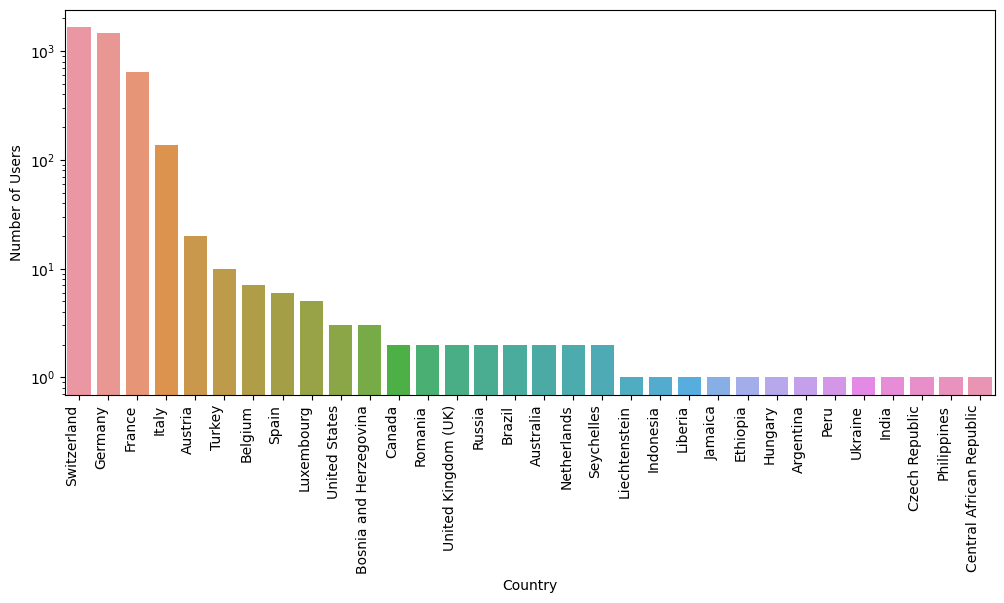

In [13]:
plt.figure(figsize=(12,5))
order = df_lovoo['full_name_country'].value_counts().index
ax= sns.countplot(data=df_lovoo, x='full_name_country', order=order)
ax.set_yscale('log')
plt.xticks(rotation=90,ha='right', fontsize=10)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

<font size="3"> From the graph, it is evident that the most popular countries on the app are Switzerland, Germany, France, Italy, and Austria, all located in Europe.

<a id='section3'> </a>
# $\text{Conclusion 1}$



#### We defined countries with more than 10 users on the app as "popular" countries, and countries with fewer than 10 users on the app as "unpopular" countries.

In [14]:
division_of_states = df_lovoo['full_name_country'].value_counts()
Unpopular_countries = df_lovoo[df_lovoo['full_name_country'].isin(division_of_states[division_of_states <= 10].index)].copy()
Popular_Countries = df_lovoo[df_lovoo['full_name_country'].isin(division_of_states[division_of_states > 10].index)].copy()

In [15]:
df_lovoo[['name','full_name_country', 'city','location']].head()

,name,full_name_country,city,location
0,daeni,Switzerland,Rothenburg,Rümlang
1,italiana 92,Switzerland,Sissach,Sissach
2,Lauraaa,Switzerland,Bâle,Bâle
3,Qqkwmdowlo,Canada,Montréal,Berne
4,schaessie {3,Germany,Rastatt,Rastatt


#### We used the ChatGPT to build a dictionary that maps the user's current location to the country they are in.

In [16]:
location_country_mapping = {
    'Bassens': 'France',
    'Liège': 'Belgium',
    'Charleroi': 'Belgium',
    'Zürich': 'Switzerland',
    'Luxembourg': 'Luxembourg',
    'Kerkrade': 'Netherlands',
    'Geneva': 'Switzerland',
    'Viviers-sur-Chiers': 'France',
    'Balsthal': 'Switzerland',
    'Kall': 'Germany',
    'Waldbronn': 'Germany',
    'Basilea': 'Switzerland',
    'Le Grand-Saconnex': 'Switzerland',
    'Emmendingen': 'Germany',
    'Ascona': 'Switzerland',
    'Torino': 'Italy',
    'Évian-les-Bains': 'France',
    'Thuin': 'Belgium',
    'Oberglatt': 'Switzerland',
    'Amel': 'Belgium',
    'Antibes': 'France',
    'Dudelange': 'Luxembourg',
    'Nittel': 'Germany',
    'Mainz': 'Germany',
    'Genève': 'Switzerland',
    'Saarlouis': 'Germany',
    'Berne': 'Switzerland',
    'Lutry': 'Switzerland',
    'Cologny': 'Switzerland',
    'Ludwigsburg': 'Germany',
    'Aarau': 'Switzerland',
    'Embrach': 'Switzerland',
    'Glis': 'Switzerland',
    'Lyss': 'Switzerland',
    'Sennwald': 'Switzerland',
    'Pforzheim': 'Germany',
    'Zug': 'Switzerland',
    'Düdelingen': 'Luxembourg',
    'Froideville': 'Switzerland',
    'Untersiggenthal': 'Switzerland',
    'Olten': 'Switzerland',
    'Freiburg': 'Germany',
    'Sallanches': 'France',
    'Lyon': 'France',
    'Memmingen': 'Germany',
    'Lebach': 'Germany',
    'Collex-Bossy': 'Switzerland',
    'Chardonne': 'Switzerland',
    'Dresden': 'Germany',
    'Lausanne': 'Switzerland'}

Unpopular_countries['current_country'] = Unpopular_countries['location'].map(location_country_mapping)
users_and_locations_with_countries = Unpopular_countries[['name', 'location', 'current_country']]
users_and_locations_with_countries.head()

,name,location,current_country
3,Qqkwmdowlo,Berne,Switzerland
24,🍒SweeT_Cherry🍒,Untersiggenthal,Switzerland
102,Domini,Ludwigsburg,Germany
105,swaga_,Aarau,Switzerland
115,ShellyBee,Embrach,Switzerland


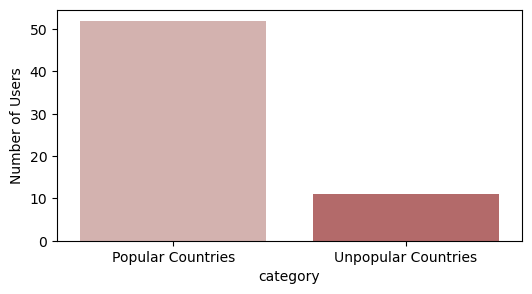

In [17]:
popular_countries_list = Popular_Countries['full_name_country'].unique()
Unpopular_countries['category'] = Unpopular_countries['current_country'].apply(lambda x: 'Popular Countries' if x in popular_countries_list else 'Unpopular Countries')
plt.figure(figsize=(6, 3))
sns.countplot(data=Unpopular_countries, x='category', palette=['#D9ADA9', '#BF5E5E'])
plt.ylabel('Number of Users')
plt.show()

<font size="3"> The graph shows that most of the users in the less popular countries are currently in the popular countries

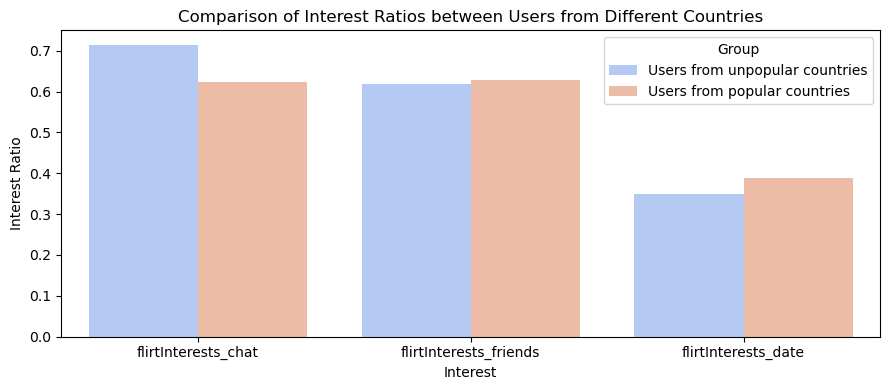

In [18]:
interest_columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

Unpopular = (Unpopular_countries[interest_columns].sum() / len(Unpopular_countries)).reset_index()
Popular = (Popular_Countries[interest_columns].sum() / len(Popular_Countries)).reset_index()

Unpopular.columns = ['Interest', 'Ratio']
Unpopular['Group'] = 'Users from unpopular countries'
Popular.columns = ['Interest', 'Ratio']
Popular['Group'] = 'Users from popular countries'

comparison_df = pd.concat([Unpopular, Popular])

plt.figure(figsize=(9, 4))
sns.barplot(data=comparison_df,x='Interest', y='Ratio', hue='Group', palette='coolwarm')
plt.title('Comparison of Interest Ratios between Users from Different Countries')
plt.ylabel('Interest Ratio')
plt.tight_layout()
plt.show()

<font size="3">From the graph it can be seen that users from the unpopular countries are more inclined to chat, while users from popular countries show more interest in dating.
The analysis in the previous graph showing that most of the users from the unpopular countries are now in the popular countries helps to conclude that their interest in the chat stems from their desire to create social connections and feel less alone in a new environment. Users in new countries may seek initial social interactions of chat as a first step in adapting to a new environment. In addition, users from the unpopular countries may open a dating app that is popular in other regions to learn and practice the language in countries where the app is popular and in this way show more chat interest.

<a id='section4'> </a>
# $\text{Conclusion 2}$

In [19]:
df_lovoo["counts_kisses"].describe()

count    3992.000000
mean      156.599699
std       377.650691
min         0.000000
25%        11.000000
50%        44.000000
75%       141.000000
max      9288.000000
Name: counts_kisses, dtype: float64

<font size="3"> We wanted to check which common words were written by the users whose amount of likes is above the median total likes in the free text and status columns

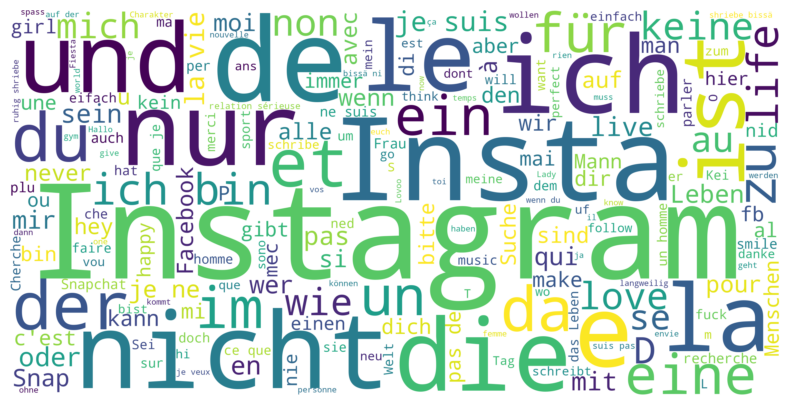

In [20]:
median_kisses = df_lovoo['counts_kisses'].median()
above_median_profiles = df_lovoo[df_lovoo['counts_kisses'] > median_kisses]
texts = above_median_profiles[['freetext', 'whazzup']].fillna('').values.flatten()
combined_text = ' '.join(texts)
wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate(combined_text)
wordcloud_image = wordcloud.to_image()
plt.figure(figsize=(11,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### We used the ChatGPT to build a dictionary of emojis and common words related to food, love, and hobbies in the languages of the countries present in our dataset.


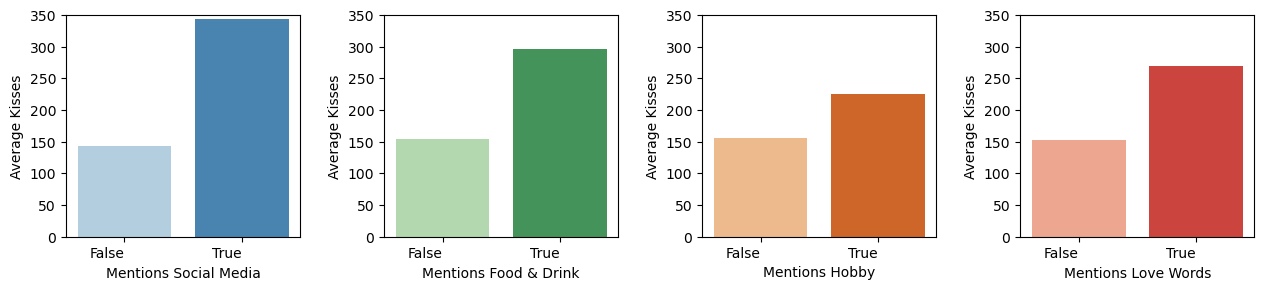

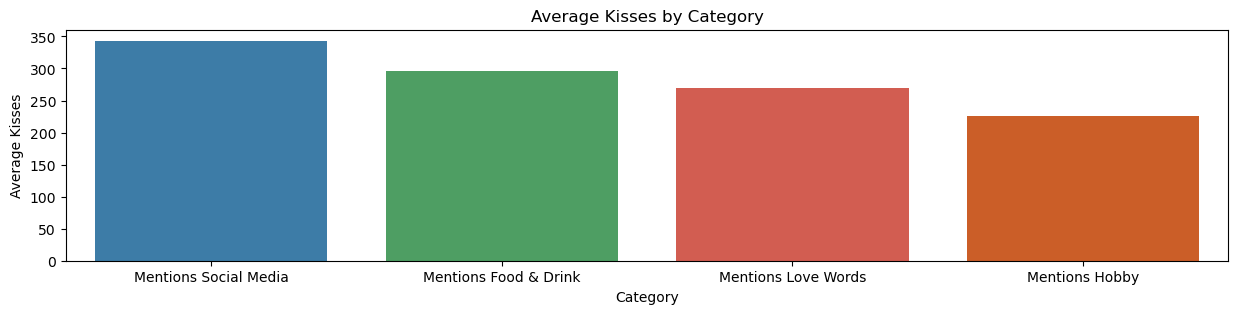

In [21]:
social_media_list =['instagram', 'insta', 'facebook', 'snapchat','snap']
df_lovoo['mentions_social_media'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(word in ' '.join(x.dropna().astype(str)).lower() for word in social_media_list ), axis=1)
social_media_kisses = df_lovoo.groupby('mentions_social_media')['counts_kisses'].mean().reset_index()
social_media_kisses.columns = ['Mentions Social Media', 'Average Kisses']

mentioned_emojis = ['🍔', '🍟', '🍕', '🌮','🍸', '🍹', '🍺', '🍭', '🍒', '🍧', '🍓', '🍇','🍉', '🍣','🍅', '🥑', '🥦', '🥒', '🌶️', '🌽', '🥕', '🥔', '🍠',  '🥐', '🥯', '🍞', '🥖', '🥨', '🥞', '🧇', '🥓', '🥩','🍗', '🍖', '🌭', '🍔', '🍟', '🍕', '🌮', '🌯', '🥙', '🥪', '🍿', '🧈', '🥫', '🍱', '🍙', '🍚', '🍛', '🍜', '🍝', '🍢','🍤', '🍥', '🥮', '🍡', '🥟', '🥠', '🦐', '🍦', '🍧', '🍨', '🍩', '🍪', '🎂', '🍰', '🧁', '🥧', '🍫', '🍬', '🍭', '🍮', '🍯', '🥛', '☕', '🍵', '🍶', '🍾', '🍷', '🍻', '🥂', '🥃', '🥤', '🧃', '🧉']
food_drink_keywords = ['food', 'essen', 'champagne', 'gelato', 'manger', 'eat', 'Bière', 'Cerveza', 'Birra','cibo', 'mangiare', 'vino', 'formaggio', 'pane', 'pizza', 'pasta', 'frutta', 'nourriture', 'boire', 'fromage', 'pain', 'vin', 'bière', 'croissant', 'baguette', 'pâtisserie', 'fondue', 'raclette', 'trinken', 'wein', 'bier', 'brot', 'schnitzel', 'apfelstrudel', 'wurst', 'knödel', 'käse', 'kartoffel', 'kuchen', 'schokolade'] 
all_food_drink_keywords_and_emojis = food_drink_keywords + mentioned_emojis
df_lovoo['mentions_food&drink'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in all_food_drink_keywords_and_emojis), axis=1)
food_drink_kisses = df_lovoo.groupby('mentions_food&drink')['counts_kisses'].mean().reset_index()
food_drink_kisses.columns = ['Mentions Food & Drink', 'Average Kisses']

mentioned_emojis1 =  ['⚽', '🎧', '🎼', '🎿', '🏄', '🎤', '🏂', '🏀', '🏊', '🏇', '🎨', '🎬', '🎮', '🎲', '🎳', '🎯', '🎱', '🎾', '🏸', '🏓', '🏒', '🏑', '🏏', '🥋', '🥊', '🥋', '🥌', '🚴', '🚵', '🏋️', '🤸', '🤼', '🤽', '🤾', '🤹', '🧗', '🧘', '🎣', '🏹', '🛷', '🛹', '🛼', '🥅', '🎻', '🪕', '🎺', '🎸', '🎷', '🥁', '📷']
hobby_keywords = ['Tierschützerin','sport', 'Musique', 'Musik', 'Music', 'Musicamusique', 'Hiphop', 'Party', 'Festa', 'Sportivefitness', 'Sportlich', 'Militante des animaux', 'Tierschützerin', 'Animal activist', 'Attivista per gli animali', 'Fiesta', 'Foot', 'Fußball', 'Soccer/Football', 'Calcio', 'Jeux vidéo', 'Videospiele', 'Video games', 'Videogiochi', 'Gymnase', 'Fitnessstudio', 'Gym', 'Palestra', 'Fitness']
all_hobby_keywords_and_emojis = hobby_keywords + mentioned_emojis1
df_lovoo['mentions_hobby'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in all_hobby_keywords_and_emojis), axis=1)
hobby_kisses = df_lovoo.groupby('mentions_hobby')['counts_kisses'].mean().reset_index()
hobby_kisses.columns = ['Mentions Hobby', 'Average Kisses']

love_keywords = ["Love", "Liebe", "Amour", "Amore", "Relation", "Beziehung", "Relation", "Relazione", "Relationship", "Beziehung", "Relation", "Relazione", "Love", "Liebe", "Amour", "Amore", "Love", "Liebe", "Amour", "Amore", "Love", "Liebe", "Amour", "Amore", "Heart", "Herz", "Cœur", "Cuore", "Couple", "Paar", "Couple", "Coppia"]
df_lovoo['mentions_love_words'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in love_keywords), axis=1)
love_kisses = df_lovoo.groupby('mentions_love_words')['counts_kisses'].mean().reset_index()
love_kisses.columns = ['Mentions Love Words', 'Average Kisses']

fig, axes = plt.subplots(1, 4, figsize=(13,3))
sns.barplot(data=social_media_kisses, x='Mentions Social Media', y='Average Kisses', palette='Blues', ax=axes[0])
sns.barplot(data=food_drink_kisses, x='Mentions Food & Drink', y='Average Kisses', palette='Greens', ax=axes[1])
sns.barplot(data=hobby_kisses, x='Mentions Hobby', y='Average Kisses', palette='Oranges', ax=axes[2])
sns.barplot(data=love_kisses, x='Mentions Love Words', y='Average Kisses', palette='Reds', ax=axes[3])

for ax in axes:
    ax.set_ylim(0, 350)
    ax.set_xticklabels(ax.get_xticklabels(), ha='right')
plt.tight_layout(pad=2.0)
plt.subplots_adjust(bottom=0.15)

categories = ['Mentions Food & Drink', 'Mentions Social Media', 'Mentions Hobby', 'Mentions Love Words']
average_kisses = [food_drink_kisses.loc[food_drink_kisses['Mentions Food & Drink'] == True, 'Average Kisses'].values[0],social_media_kisses.loc[social_media_kisses['Mentions Social Media'] == True, 'Average Kisses'].values[0],hobby_kisses.loc[hobby_kisses['Mentions Hobby'] == True, 'Average Kisses'].values[0],love_kisses.loc[love_kisses['Mentions Love Words'] == True, 'Average Kisses'].values[0]]
comparison_data = pd.DataFrame({'Category': categories, 'Average Kisses': average_kisses})
comparison_data = comparison_data.sort_values(by='Average Kisses', ascending=False)

plt.figure(figsize=(15,3))
sns.barplot(data=comparison_data, x='Category', y='Average Kisses', palette=['#2c7fb8', '#41ab5d', '#e74c3c', '#e6550d'])
plt.title('Average Kisses by Category')
plt.ylabel('Average Kisses')
plt.show()

<font size="3">According to the graph, it can be observed that in all categories—social media, food and drink, hobbies, and love-related words—there is an increase in the number of kisses when profiles mention these topics.
In particular, mentioning social media and food and drink seems to have the most significant impact on the number of kisses. Mentioning hobbies and love-related words also increases the number of kisses, but to a lesser extent.
It can be inferred that mentioning these categories might attract more attention to profiles in the app.

<a id='section5'> </a>
# $\text{Conclusion 3}$

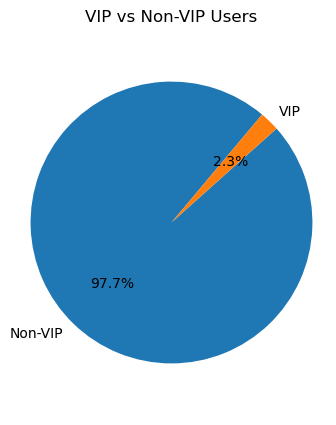

In [22]:
vip_counts = df_lovoo['isVip'].value_counts()
vip_counts.index = ['Non-VIP', 'VIP']
plt.figure(figsize=(4, 5))
plt.pie(vip_counts, labels=vip_counts.index, autopct='%1.1f%%', startangle=50, textprops={'fontsize': 10})
plt.title("VIP vs Non-VIP Users")
plt.axis('equal')
plt.show()

<font size="3"> From the pie chart, it can be seen that the majority of users do not purchase VIP status in the app.

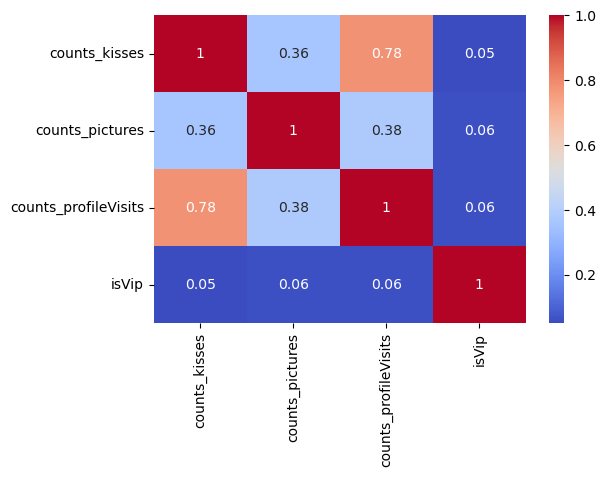

In [23]:
list1= ['counts_kisses','counts_pictures','counts_profileVisits','isVip']
plt.figure(figsize=(6,4))
correlation_matrix = df_lovoo[list1].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<font size="3">From the correlation matrix displayed, we can observe the following:
The correlation between counts_kisses and counts_profileVisits is very high (0.78). This indicates that profiles receiving more kisses tend to have more profile visits. There is a strong positive relationship.
The correlation between counts_pictures and counts_kisses is moderate (0.36), indicating that profiles with more pictures tend to receive more kisses.
The correlations involving isVip are very low (ranging from 0.05 to 0.06). This suggests that being a VIP user does not have a significant relationship with the number of kisses, pictures, or profile visits.

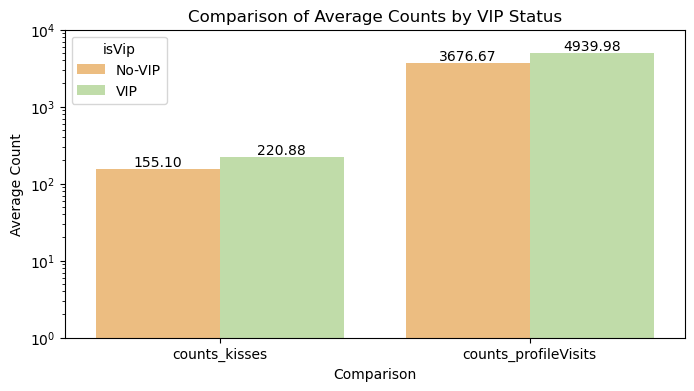

In [24]:
df_lovoo_melted = pd.melt(df_lovoo, id_vars=['isVip'], value_vars=['counts_kisses', 'counts_profileVisits'],var_name='Comparison', value_name='Count')
df_lovoo_melted['isVip'] = df_lovoo_melted['isVip'].map({1: 'VIP', 0: 'No-VIP'})

plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df_lovoo_melted, x='Comparison', y='Count', hue='isVip',errorbar=None, palette='Spectral')
plt.ylabel('Average Count')
plt.title('Comparison of Average Counts by VIP Status')
plt.yscale('log')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height,f'{height:.2f}', ha='center', va='bottom')
ax.set_yticks([1, 10, 100, 1000, 10000])
plt.show()

<font size="3">From the graph it can be seen that the average profile likes and visits are higher for VIP users compared to non-VIP users, but the difference is minor.

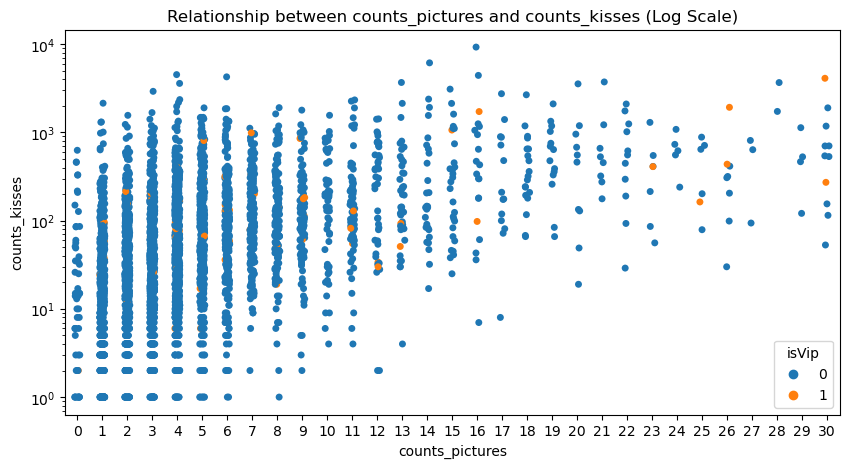

In [25]:
plt.figure(figsize=(10,5))
sns.stripplot(x="counts_pictures", y="counts_kisses",hue="isVip", data=df_lovoo)
plt.yscale('log')
plt.xlabel('counts_pictures')
plt.ylabel('counts_kisses')
plt.title('Relationship between counts_pictures and counts_kisses (Log Scale)')
plt.show()

<font size="3">The graph shows that there is a general trend that as the number of photos increases, the number of likes also tends to increase. This trend is more noticeable in the higher number of photos where the spread of likes is more significant.
VIP users (orange) are scattered throughout the graph, indicating that VIP status does not necessarily correlate with higher likes. Non-VIP users (blue) are more densely populated at the lower photo count, but also spread out over higher counts, showing that having more photos can lead to higher likes regardless of VIP status.


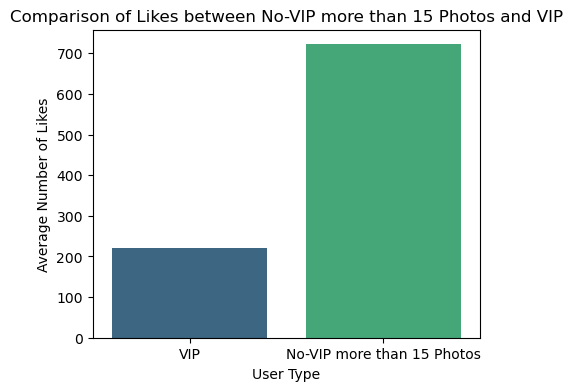

In [26]:
vip_ = df_lovoo[(df_lovoo['isVip'] == True)]
non_vip_more_than_15 = df_lovoo[(df_lovoo['isVip'] == False) & (df_lovoo['counts_pictures'] >15 )]
filtered_df = pd.concat([vip_, non_vip_more_than_15])
filtered_df['User Type'] = filtered_df['isVip'].apply(lambda x: 'VIP' if x else 'No-VIP more than 15 Photos')
plt.figure(figsize=(5, 4))
sns.barplot(data=filtered_df, y='counts_kisses', x='User Type',errorbar=None,palette ='viridis')
plt.ylabel('Average Number of Likes')
plt.title('Comparison of Likes between No-VIP more than 15 Photos and VIP')
plt.show()

<font size="3">The graph shows a comparison of the average number of likes between VIP users and non-VIP users who have more than 12 photos.
Non-VIP users with more than 12 photos get more likes on average compared to VIP users.
This suggests that a higher number of photos may be a more influential factor in attracting likes compared to VIP status. The substantial difference in average number of 
likes implies that users who upload more photos tend to receive more engagement regardless of their VIP status.